this dataset is imported from kaggle 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [4]:
df = pd.concat([df_train,df_test])

In [5]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
df['x'] =df['x'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   int32  
 1   y       999 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 19.5 KB


In [8]:
df.dropna(inplace=True)

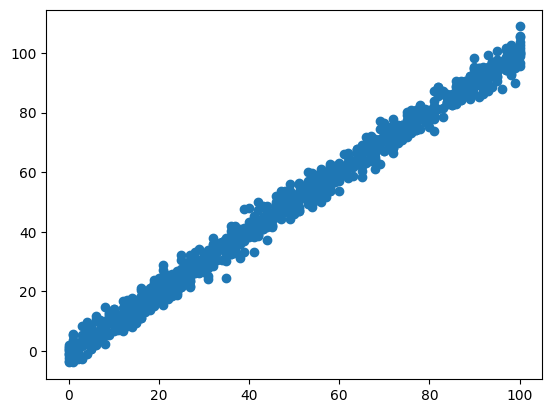

In [9]:
plt.scatter(df['x'],df['y'])

In [10]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test)

In [15]:
X_test.shape

(200, 1)

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
adj_r2 = 1 - (((1-r2)*(200-1))/(40-1-1))
adj_r2

MAE 2.302950410605084
MSE 7.884318331220316
RMSE 2.8079028350746604
R2_score 0.9912672778939369


0.9542681131814063

Text(0.5, 1.0, 'Best Fit Line')

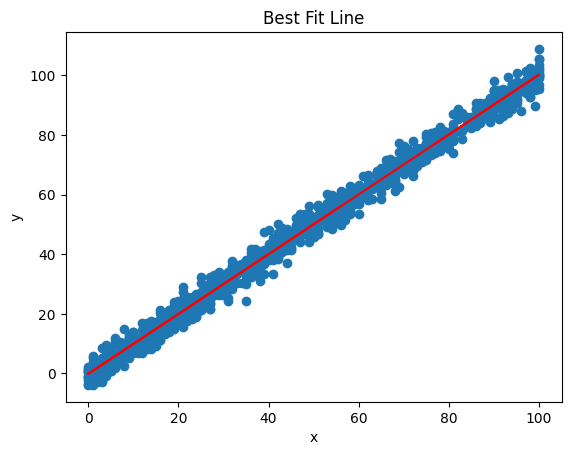

In [17]:
plt.scatter(df['x'],df['y'])  
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('x')  
plt.ylabel('y')
plt.title("Best Fit Line")